# Exploring Telco Customer Churn
The main goal of this notebook is to analyze the various aspects of Telco Customer churn via the means of visualization. Some of the questions I intend to answer are:
1. What is the profile of a customer that leaves?
2. Conversely - what is the profile of the customer that stays?
3. Everything else.. (?!)

## 1. Importing Libraries and Loading data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Loading the data
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [19]:
# displaying the head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# get the various factor levels
for column in list(df.columns):
    # skip the first column as it will contain unique numbers
    if column == 'customerID':
        pass
    else:
        print(column, df[column].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

From the displaying the factors and the information about the types of the columns of the dataset it seems that are some mismatches:
1. `SeniorCitizen` - the type is int, however the column just indicates whether a person is a senior citizen or not with values of either 1 or 0. It should be fine as is.
2. `TotalCharges` - the type is object, however it would indicate that this column contains the sum of all of the charges to a customer. This should be `float`.

In [22]:
def assign_correct_type(data):
    '''
        First try to correct the type by pandas means.
        If the first fails go through each of the rows of the datasets and try to assign it to a `float` type - if that fails assign the value from the monthly charge multiplied by the tenure.
        Returns the corrected dataframe.
    '''
    try:
        data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric)
    except:
        for row in df.iterrows():
            try:
                data.loc[row[0], 'TotalCharges'] = float(row[1]['TotalCharges'])
            except:
                data.loc[row[0], 'TotalCharges'] = row[1]['MonthlyCharges'] * row[1]['tenure']
    
    data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric)
    
    return data

In [23]:
df = assign_correct_type(df)

Let's check the types again just to be sure.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

All good.

## 2. Checking for missing data.

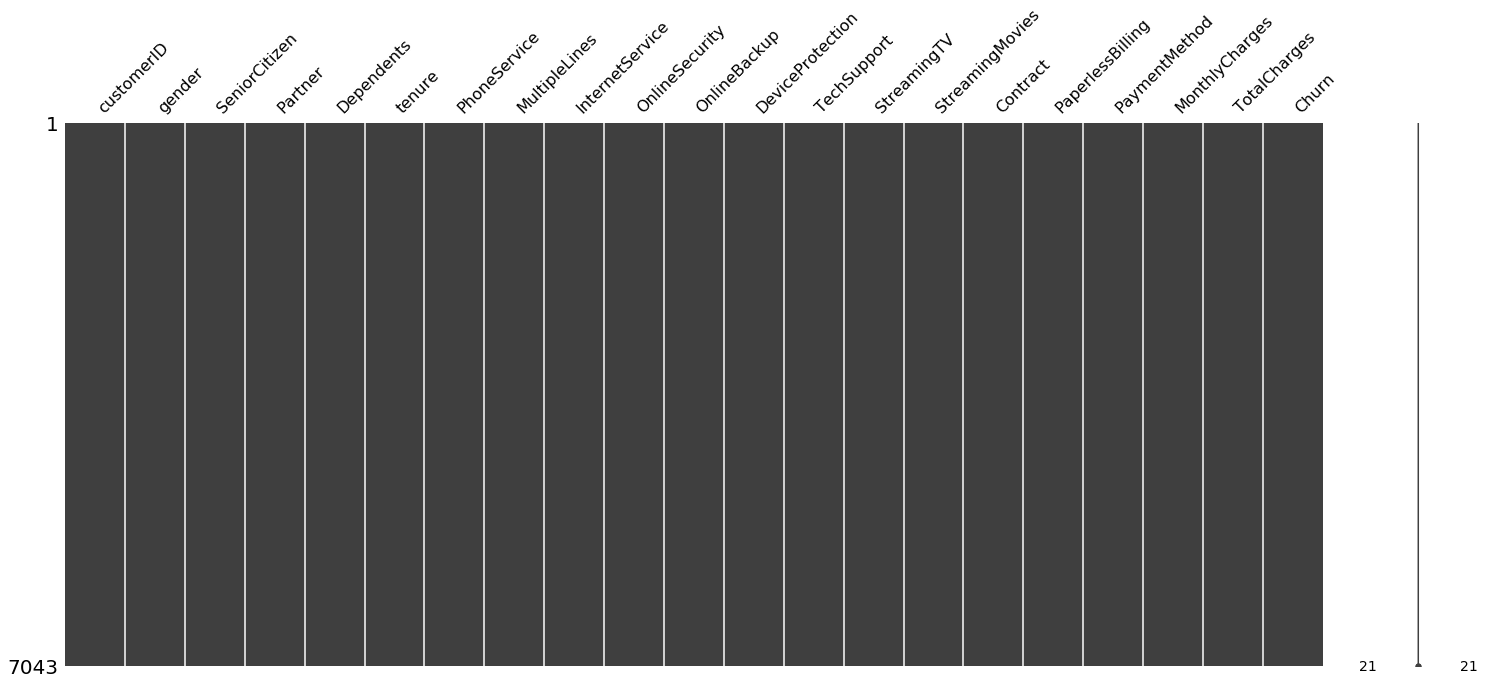

In [25]:
import missingno as msno
msno.matrix(df)

A clean data set = pure joy.

## 3. Exploratory Data Analysis
Let's start by exploring the simple questions like - are senior citizens more likely to stay with the telecom, or which of the two genders is more likely to leave? The point is to get a feel for the different categories and how they contribute to the `churn`.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

### 3.1 Categoricals' effect on the churn rate.

In [81]:
def display_features(plot_type, feature_array, dframe):
    _, axes = plt.subplots(1, len(feature_array), figsize=(25,5))
    if plot_type == 'count':
        i = 0
        for item in feature_array:
            sns.countplot(x=item, hue='Churn', data=dframe, ax=axes[i])
            i += 1
        plt.show()
        
    elif plot_type =='bar':
        plot = 0
        y, hue = 'prop', 'Churn'
        for item in feature_array:
            x = item
            prop_df = (dframe[x]
                  .groupby(dframe[hue])
                  .value_counts(normalize=True)
                  .rename(y)
                  .reset_index())
            sns.barplot(x=x,y=y, hue=hue, data=prop_df, ax=axes[plot])
            plot += 1
        plt.show()

In [93]:
def display_features_perc(feature_array, dframe, labels_direction='horizontal'):
    _, axes = plt.subplots(2, len(feature_array), figsize=(25,8))
    i = 0
    y, hue = 'prop', 'Churn'
    for item in feature_array:
        sns.countplot(x=item, hue=hue, data=dframe, ax=axes[0,i])
        x = item
        prop_df = (dframe[x]
                  .groupby(dframe[hue])
                  .value_counts(normalize=True)
                  .rename(y)
                  .reset_index())
        sns.barplot(x=x,y=y, hue=hue, data=prop_df, ax=axes[1, i])
        i += 1
        
    plt.show()            

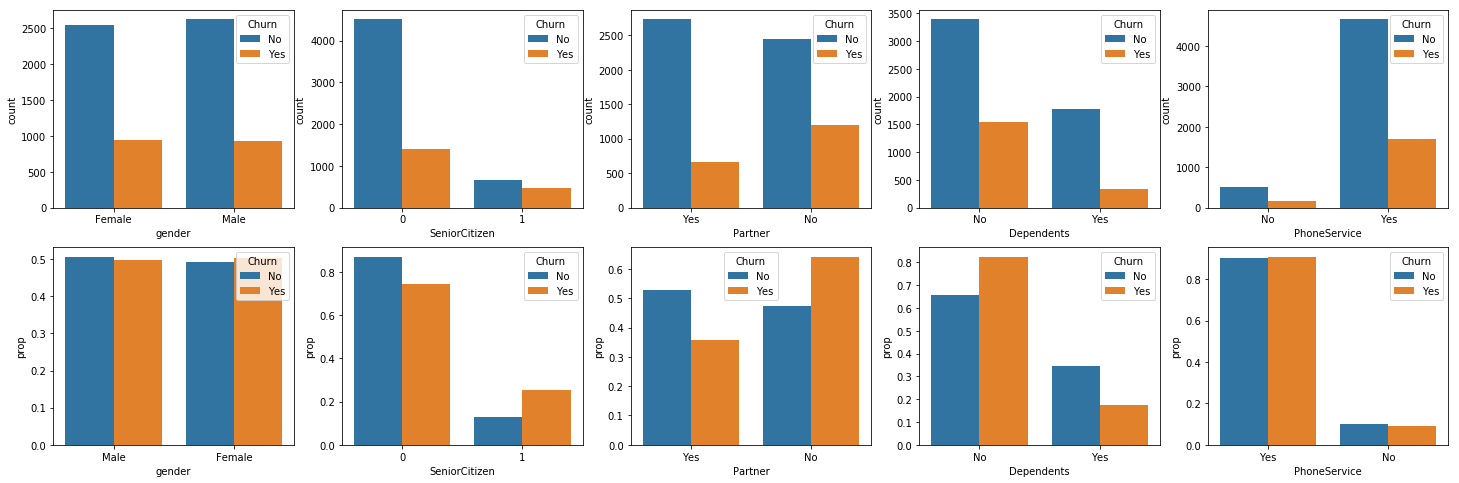

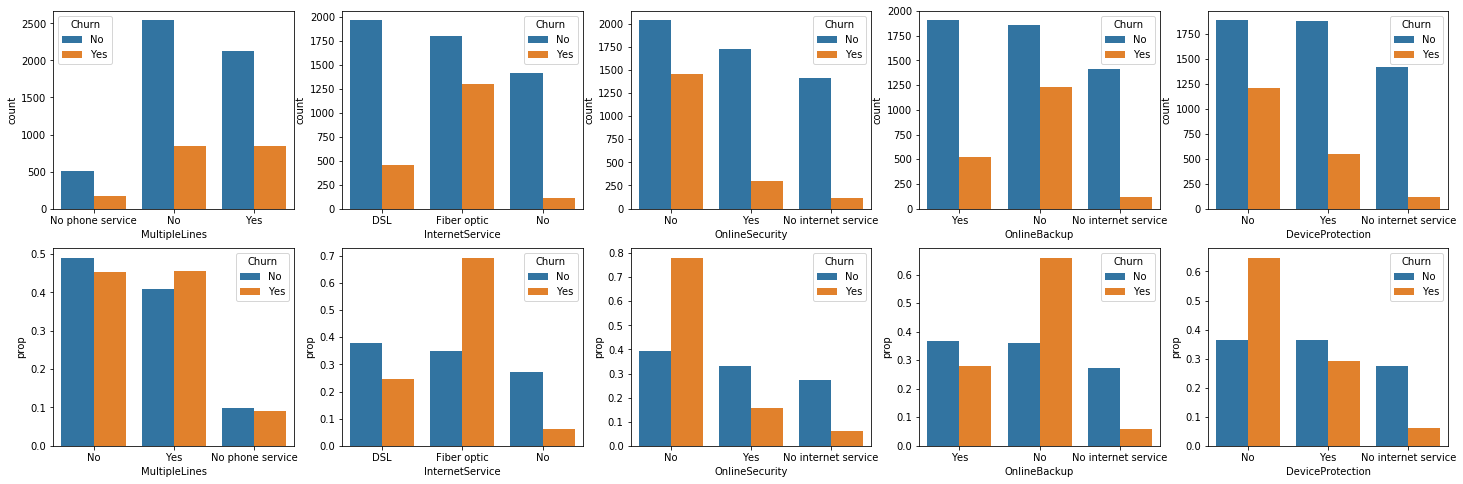

In [91]:
features = ['gender', 'SeniorCitizen','Partner','Dependents', 'PhoneService']
display_features_perc(features, df)
features = ['MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection']
display_features_perc(features, df)

#### Thoughts on first 10 categoricals:
From both the count-plots and the bar plots it seems that: *b*
1. *gender*: Both genders seem equaly likely to leave.
2. *Senior Citizen*: Senior citizens, who leave seem to be more, percentage wise, but looking at the counts the difference is small.
3. *Partner*: From the percentages it seems that people with no partner are more likely to leave than those who have one.
4. *Dependents*: From both counts and percentages it looks like that if a person doesn't have dependents - he's more likely to leave.
5. *Phone Service*: Looking at both plots it seems that it equally likely for a user to leave, whether he has a phone service or not.
6. *MultipleLines*:
7. *InternetService*:
8. *OnlineSecurity*:
9, *OnlineBackupt*:
10. *DeviceProtection*:

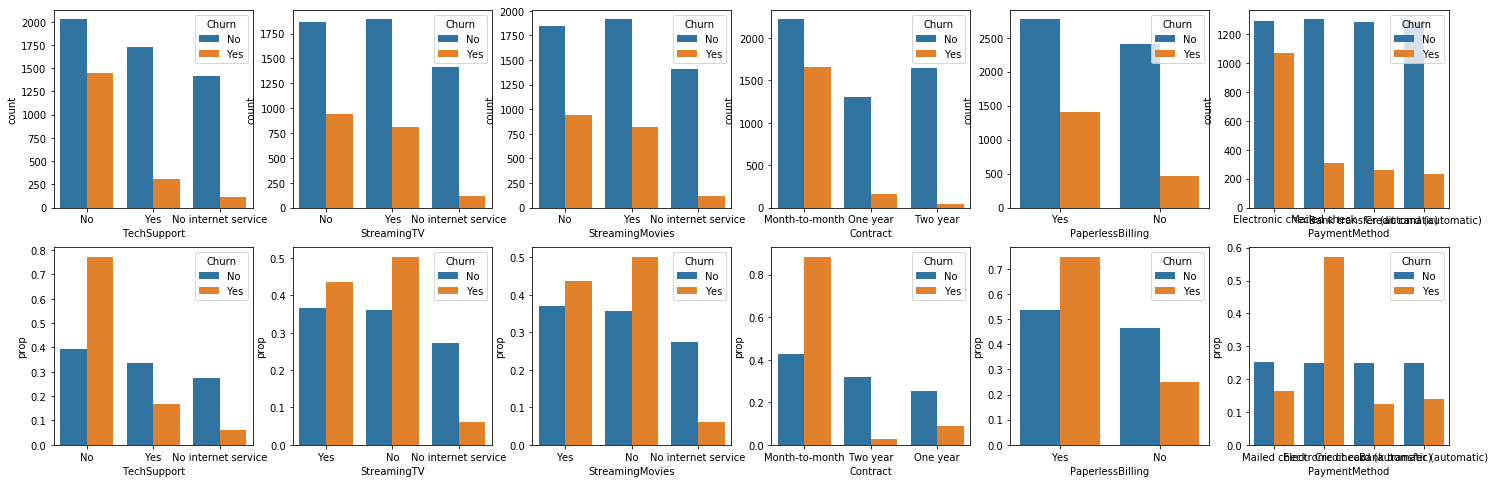

In [92]:
features = ['TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
display_features_perc(features, df)

#### Thoughts on the other 6 categoricals:
`Placeholder Text`

### 3.2 Correlation plot
`Placeholder reasoning text.`

Before making the correlation plot, we need to encode the categorical variables.

In [118]:
df_enc = df.copy()
categorical_columns = ['gender', 'SeniorCitizen','Partner','Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod','Churn']
# change the columns to category
df_enc[categorical_columns] = df_enc[categorical_columns].astype('category')
# dropping the customer id
df_enc = df_enc.drop('customerID', axis=1)

In [119]:
# getting the category codes
for category in categorical_columns:
    df_enc[category] = df_enc[category].cat.codes
# getting the correlation matrix
df_cormat = df_enc.corr()

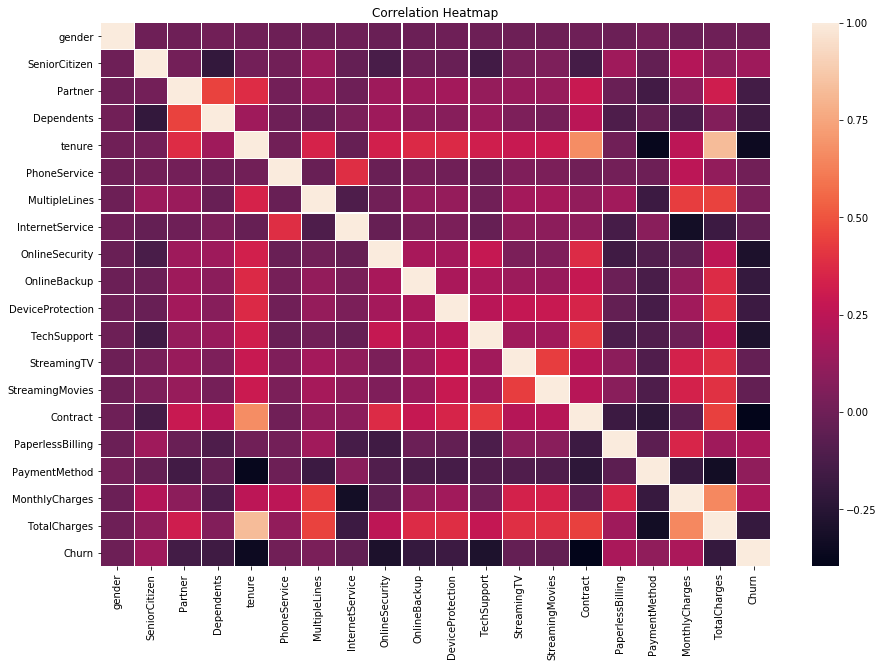

In [128]:
# Correlation heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(df_cormat, linewidths = 0.1)
plt.title('Correlation Heatmap')
plt.show()

Looking at the correlation heatmap it seems there is a strong positive correlation between *tenure* and *Total Charges*, which is to be expected - the longer you are there, the higher the total charges.

### 3.3 Numerical Features' effect on Churn

#### 3.3.1 Distributions
For the purpose of investigating the churn with in the numerical features - *tenure*, *Monthly Charges* and *Total Charges* - the KDE plots will be used.

In [163]:
def pdfplot(features):
    _, axes = plt.subplots(1, len(features), figsize=(21,5))
    i = 0
    for feature in features:
        ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature], color = 'Blue', label = 'Churn:No', ax=axes[i])
        ax0.set_title(feature)
        ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature], color = 'Red', label = 'Churn:Yes', ax=axes[i])
        i += 1

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


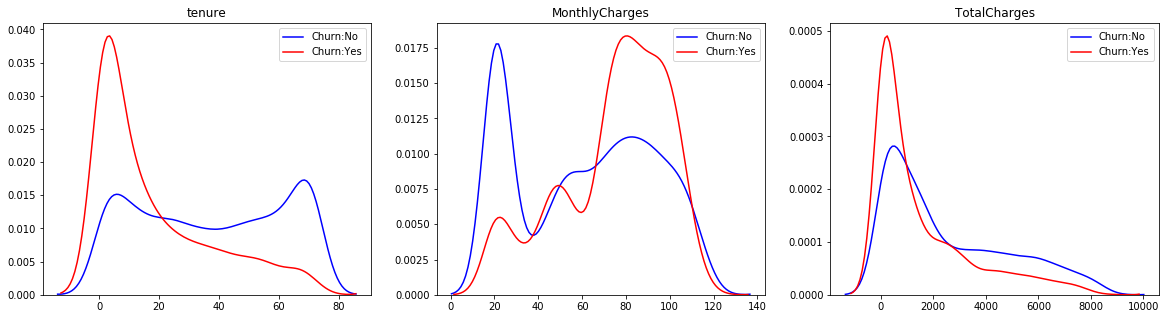

In [164]:
pdfplot(['tenure', 'MonthlyCharges', 'TotalCharges'])

`Commentary Placeholder`

#### 3.3.2 Monthly Chargest in relation with categoricals
`boxplots`

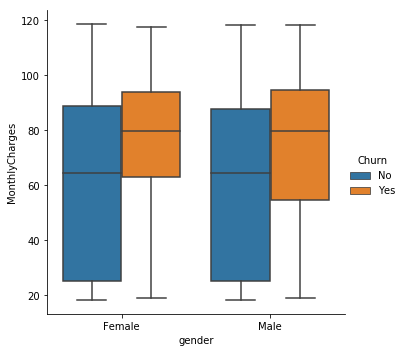

In [205]:
sns.catplot(x='gender', y='MonthlyCharges', hue='Churn', kind='box', data=df)
plt.show()

`gender comentary placeholder`

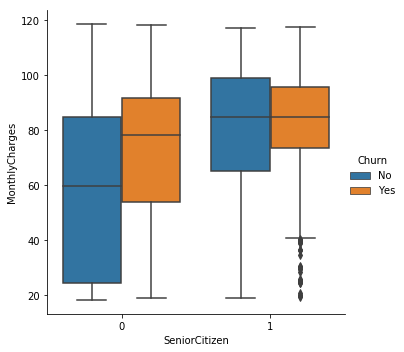

In [201]:
sns.catplot(x='SeniorCitizen', y='MonthlyCharges', hue='Churn', kind='box', data=df)
plt.show()

`SeniorCitizen comentary placeholder`